**Implementing Logistic KNN classifier,Normalization and Distancce Metrix on HEART Disease**

REFERENCE:

Heart disease prediction using machine learning algorithms

DOI:10.1088/1757-899X/1022/1/012072

IOP Conference Series: Materials Science and Engineering

In [1872]:
#Importing the required libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split #sampling purpose
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling and validation
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [1873]:
data = pd.read_csv(r'C:\MLfiles\\NEW_MID_EXAM.csv')

In [1874]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [1875]:
print('Number of rows of the data: ', data.shape[0])
print('Number of columns of the data: ', data.shape[1])

Number of rows of the data:  270
Number of columns of the data:  14


In [1876]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [1877]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [1878]:
data.groupby(['Heart Disease'])['Heart Disease'].count()

Heart Disease
Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [1879]:
df = data.copy()

In [1880]:
df['Heart Disease'].replace({'Absence':'A','Presence':'P'})

0      P
1      A
2      P
3      A
4      A
      ..
265    A
266    A
267    A
268    A
269    P
Name: Heart Disease, Length: 270, dtype: object

In [1881]:
y = df['Heart Disease']
X = df.drop(['Heart Disease'],axis=1);

In [1882]:
#Now building  a KNN model for our data
KNN_MODEL = neighbors.KNeighborsClassifier(n_neighbors=2)

In [1883]:
#fitting the model
KNN_MODEL.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [1884]:
#predicting y i.e y_cap
y_cap = KNN_MODEL.predict(X)

In [1885]:
confusion_matrix(y,y_cap)

array([[150,   0],
       [ 62,  58]])

In [1886]:
accuracy_score(y, y_cap)

0.7703703703703704

In [1887]:
#now splitting the train and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [1888]:
X_train.shape

(243, 13)

In [1889]:
X_test.shape

(27, 13)

In [1890]:
y_train.shape ,y_test.shape

((243,), (27,))

In [1891]:
#Build and test the model on training set
knn_model_train = neighbors.KNeighborsClassifier(n_neighbors=3)

In [1892]:
#AS we are doing for training set we will fit knn model for trainng set i.e X_train and y_train
knn_model_train.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [1893]:
#after fitting, Now validate the fitted model for training set
y_cap_train = knn_model_train.predict(X_train)

In [1894]:
confusion_matrix(y_train,y_cap_train)

array([[117,  21],
       [ 30,  75]])

In [1895]:
accuracy_score(y_train,y_cap_train)

0.7901234567901234

In [1896]:
#Now do validation for testing set
y_cap_test = knn_model_train.predict(X_test)

In [1628]:
#checking the confusion matrix
confusion_matrix(y_test,y_cap_test)

array([[11,  6],
       [ 2,  8]])

In [1629]:
#accuracy
accuracy_score(y_test,y_cap_test)

0.7037037037037037

In [1899]:
#building sample for various test size
def build_test_model(X, y, tsz,neighbours):

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = tsz)

    knn_model_train = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
    knn_model_train.fit(X_train,y_train)
    
    y_cap_train = knn_model_train.predict(X_train)
    conf_train = confusion_matrix(y_train,y_cap_train)
    print("\nThe confusion matrix for training data set is:\n",conf_train)
    accr_train = accuracy_score(y_train,y_cap_train)
    print("\nThe Accurancy for training data set is:",accr_train)
    
    y_cap_test = knn_model_train.predict(X_test)
    conf_test = confusion_matrix(y_test,y_cap_test)
    print("\nThe confusion matrix for testing data set is:\n",conf_test)
    accr_test = accuracy_score(y_test,y_cap_test)
    print("\nThe Accurancy for testing data set is:",accr_test)
    

In [1909]:
build_test_model(X, y, 0.1,5)


The confusion matrix for training data set is:
 [[108  28]
 [ 32  75]]

The Accurancy for training data set is: 0.7530864197530864

The confusion matrix for testing data set is:
 [[13  1]
 [ 3 10]]

The Accurancy for testing data set is: 0.8518518518518519


In [1914]:
test_vals = [0.1, 0.2, 0.3, 0.4]
for tsz in test_vals:
    print('Test size is', 1-tsz, tsz)
    print(build_test_model(X, y, tsz,neighbours))

Test size is 0.9 0.1

The confusion matrix for training data set is:
 [[110  22]
 [ 36  75]]

The Accurancy for training data set is: 0.7613168724279835

The confusion matrix for testing data set is:
 [[13  5]
 [ 3  6]]

The Accurancy for testing data set is: 0.7037037037037037
None
Test size is 0.8 0.2

The confusion matrix for training data set is:
 [[92 26]
 [32 66]]

The Accurancy for training data set is: 0.7314814814814815

The confusion matrix for testing data set is:
 [[25  7]
 [ 5 17]]

The Accurancy for testing data set is: 0.7777777777777778
None
Test size is 0.7 0.3

The confusion matrix for training data set is:
 [[82 23]
 [30 54]]

The Accurancy for training data set is: 0.7195767195767195

The confusion matrix for testing data set is:
 [[34 11]
 [17 19]]

The Accurancy for testing data set is: 0.654320987654321
None
Test size is 0.6 0.4

The confusion matrix for training data set is:
 [[75 14]
 [26 47]]

The Accurancy for training data set is: 0.7530864197530864

The con

In [1866]:
lr_model = LogisticRegression()

In [1657]:
X.shape

(270, 13)

In [1658]:
lr_model.fit(X, y)

LogisticRegression()

In [1668]:
y_pred = lr_model.predict(X)
confusion_matrix(y, y_pred)

array([[135,  15],
       [ 23,  97]])

In [1669]:
accuracy_score(y, y_pred)

0.8592592592592593

In [1670]:
#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1) 

In [1671]:
X_train.shape,X_test.shape

((243, 13), (27, 13))

In [1672]:
#Build and test the model on training set
lr_model_tr = LogisticRegression()
lr_model_tr.fit(X_train, y_train)

LogisticRegression()

In [1673]:
y_pred_tr = lr_model_tr.predict(X_train)
confusion_matrix(y_train, y_pred_tr)

array([[125,  13],
       [ 20,  85]])

In [1674]:
accuracy_score(y_train, y_pred_tr)

0.8641975308641975

In [1675]:
y_pred_ts = lr_model_tr.predict(X_test)
confusion_matrix(y_test, y_pred_ts)

array([[12,  0],
       [ 2, 13]])

In [1676]:
accuracy_score(y_test, y_pred_ts)

0.9259259259259259

In [1927]:
def build_test_model(tsz, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    y_pred_tr = lr_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    y_pred_ts = lr_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    return (cm_tr, acc_tr, cm_ts, acc_ts)

In [1938]:
build_test_model(0.1,X,y)

C:\Users\dilli krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[125,  13],
        [ 21,  84]]),
 0.8600823045267489,
 array([[12,  0],
        [ 2, 13]]),
 0.9259259259259259)

In [1945]:
test_vals = [0.1, 0.2, 0.3, 0.4]
for tsz in test_vals:
    print('Test size is', 1-tsz, tsz)
    print(build_test_model(tsz, X, y))

Test size is 0.9 0.1
(array([[121,  14],
       [ 19,  89]]), 0.8641975308641975, array([[12,  3],
       [ 2, 10]]), 0.8148148148148148)
Test size is 0.8 0.2
(array([[115,  12],
       [ 13,  76]]), 0.8842592592592593, array([[20,  3],
       [11, 20]]), 0.7407407407407407)
Test size is 0.7 0.3
(array([[96,  9],
       [11, 73]]), 0.8941798941798942, array([[38,  7],
       [ 9, 27]]), 0.8024691358024691)
Test size is 0.6 0.4
(array([[84,  8],
       [14, 56]]), 0.8641975308641975, array([[50,  8],
       [ 8, 42]]), 0.8518518518518519)


C:\Users\dilli krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dilli krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

**Testing for Different Noralization Techniques**

In [1799]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1) 
#model for training set
from sklearn.neighbors import KNeighborsClassifier
standard_train = KNeighborsClassifier(n_neighbors=5)
standard_train.fit(X_train, y_train)

#validating for traning set
scaler_y_cap_train = standard_train.predict(X_train)
scaler_conf_train = confusion_matrix(y_train,scaler_y_cap_train)
scaler_accr_train = accuracy_score(y_train,scaler_y_cap_train)

#validating for testing set
scaler_y_cap_test = standard_train.predict(X_test)
scaler_conf_test = confusion_matrix(y_test,scaler_y_cap_test)
scaler_accr_test = accuracy_score(y_test,scaler_y_cap_test)

print("StandardScaler confusion Matrix \n",scaler_conf_train)
print("StandardScaler Training Accurcy",scaler_accr_train)
print("StandardScaler confusion Matrix \n",scaler_conf_test)
print("StandardScaler Testing Accurcy",scaler_accr_test)


StandardScaler confusion Matrix 
 [[124  13]
 [ 21  85]]
StandardScaler Training Accurcy 0.8600823045267489
StandardScaler confusion Matrix 
 [[13  0]
 [ 2 12]]
StandardScaler Testing Accurcy 0.9259259259259259


In [1860]:
Minmax = MinMaxScaler()
X = Minmax.fit_transform(X)

#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1) 
#model for training set
from sklearn.neighbors import KNeighborsClassifier
Min_max = KNeighborsClassifier(n_neighbors=5)
Min_max.fit(X_train, y_train)

#validating for traning set
Minmax_y_cap_train = Min_max.predict(X_train)
Minmax_conf_train = confusion_matrix(y_train,Minmax_y_cap_train)
Minmax_accr_train = accuracy_score(y_train,Minmax_y_cap_train)

#validating for testing set
Minmax_y_cap_test = Min_max.predict(X_test)
Minmax_conf_test = confusion_matrix(y_test,Minmax_y_cap_test)
Minmax_accr_test = accuracy_score(y_test,Minmax_y_cap_test)

print("Minmax confusion Matrix \n",Minmax_conf_train)
print("Minmax Training Accurcy",Minmax_accr_train)
print("Minmax confusion Matrix \n",Minmax_conf_test)
print("Minmax Testing Accurcy",Minmax_accr_test)

Minmax confusion Matrix 
 [[115  23]
 [ 20  85]]
Minmax Training Accurcy 0.823045267489712
Minmax confusion Matrix 
 [[12  0]
 [ 3 12]]
Minmax Testing Accurcy 0.8888888888888888


In [1863]:
Robust= RobustScaler()
X = Robust.fit_transform(X)

#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1) 
#model for training set
from sklearn.neighbors import KNeighborsClassifier
Robust_sca = KNeighborsClassifier(n_neighbors=5)
Robust_sca.fit(X_train, y_train)

#validating for traning set
Robust_y_cap_train = Robust_sca.predict(X_train)
Robust_conf_train = confusion_matrix(y_train,Robust_y_cap_train)
Robust_accr_train = accuracy_score(y_train,Robust_y_cap_train)

#validating for testing set
Robust_y_cap_test = Robust_sca.predict(X_test)
Robust_conf_test = confusion_matrix(y_test,Robust_y_cap_test)
Robust_accr_test = accuracy_score(y_test,Robust_y_cap_test)

print("RobustScaler confusion Matrix \n",Robust_conf_train)
print("RobustScaler Training Accurcy",Robust_accr_train)
print("RobustScaler confusion Matrix \n",Robust_conf_test)
print("RobustScaler Testing Accurcy",Robust_accr_test)

RobustScaler confusion Matrix 
 [[120  13]
 [ 17  93]]
RobustScaler Training Accurcy 0.8765432098765432
RobustScaler confusion Matrix 
 [[16  1]
 [ 1  9]]
RobustScaler Testing Accurcy 0.9259259259259259


In [1777]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
acclist = {}

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    
    for k in (7,9,11):
        for tsz in (0.1, 0.2):
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=tsz)
            knn_model = KNeighborsClassifier(n_neighbors=k)
            knn_model.fit(X_train, y_train)
            y_test_cap = knn_model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_cap)
            acclist[(scaler, k, tsz)] = test_accuracy
            
for tsz, test_accuracy in acclist.items():
    scaler_name, k, test_size = tsz
    print(f"{scaler_name}, k_value: {k}")
    print(f"Test Size: {test_size}, Accuracy: {test_accuracy}")


StandardScaler(), k_value: 7
Test Size: 0.1, Accuracy: 0.9259259259259259
StandardScaler(), k_value: 7
Test Size: 0.2, Accuracy: 0.7777777777777778
StandardScaler(), k_value: 9
Test Size: 0.1, Accuracy: 0.9259259259259259
StandardScaler(), k_value: 9
Test Size: 0.2, Accuracy: 0.8888888888888888
StandardScaler(), k_value: 11
Test Size: 0.1, Accuracy: 0.7777777777777778
StandardScaler(), k_value: 11
Test Size: 0.2, Accuracy: 0.7592592592592593
MinMaxScaler(), k_value: 7
Test Size: 0.1, Accuracy: 0.9259259259259259
MinMaxScaler(), k_value: 7
Test Size: 0.2, Accuracy: 0.8148148148148148
MinMaxScaler(), k_value: 9
Test Size: 0.1, Accuracy: 0.8518518518518519
MinMaxScaler(), k_value: 9
Test Size: 0.2, Accuracy: 0.8148148148148148
MinMaxScaler(), k_value: 11
Test Size: 0.1, Accuracy: 0.8518518518518519
MinMaxScaler(), k_value: 11
Test Size: 0.2, Accuracy: 0.7777777777777778
RobustScaler(), k_value: 7
Test Size: 0.1, Accuracy: 0.9259259259259259
RobustScaler(), k_value: 7
Test Size: 0.2, Accur

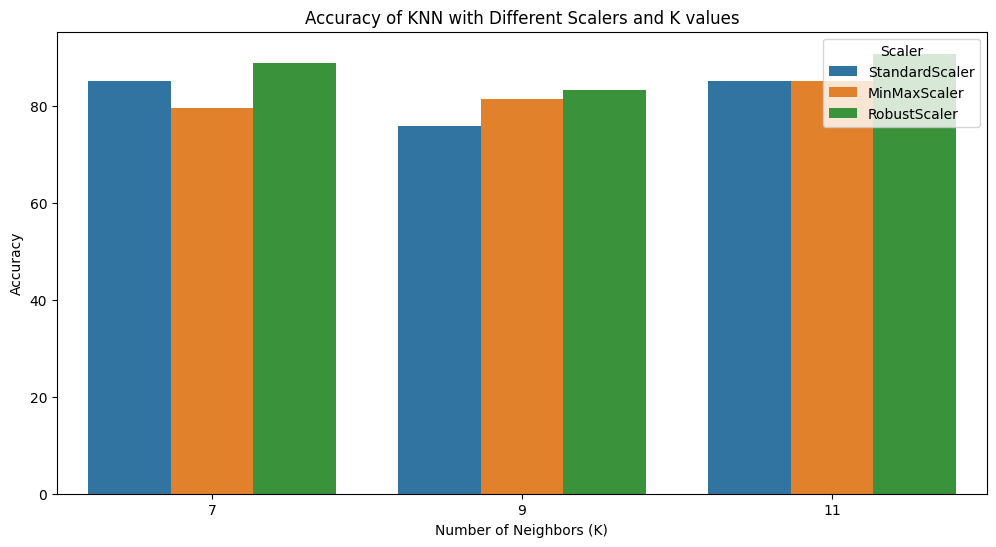

In [1951]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
acclist = []

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    for k in (7, 9, 11):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        y_test_cap = knn_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_cap) * 100
        acclist.append((scaler.__class__.__name__, k, test_accuracy))
results = pd.DataFrame(acclist, columns=['Scaler', 'k', 'Accuracy'])

plt.figure(figsize=(12, 6))
sns.barplot(x='k', y='Accuracy', hue='Scaler', data=results)
plt.title('Accuracy of KNN with Different Scalers and K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend(title='Scaler')
plt.show()

***DISTANCE METRICS***

In [1859]:
metrics = ['euclidean', 'manhattan']
acclist = {}

for metric in metrics:
    for k in (5, 15, 29):
        for tsz in (0.1, 0.2): 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsz)
            knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
            knn_model.fit(X_train, y_train)
            y_test_cap = knn_model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_cap)
            acclist[(metric, k, tsz)] = test_accuracy

for tsz, test_accuracy in acclist.items():
    metric, k, test_size = tsz
    print(f"Metric: {metric}, k: {k}, Test Size: {test_size}, Accuracy: {test_accuracy}")

Metric: euclidean, k: 5, Test Size: 0.1, Accuracy: 0.9259259259259259
Metric: euclidean, k: 5, Test Size: 0.2, Accuracy: 0.8703703703703703
Metric: euclidean, k: 15, Test Size: 0.1, Accuracy: 0.8148148148148148
Metric: euclidean, k: 15, Test Size: 0.2, Accuracy: 0.8333333333333334
Metric: euclidean, k: 29, Test Size: 0.1, Accuracy: 0.9259259259259259
Metric: euclidean, k: 29, Test Size: 0.2, Accuracy: 0.8888888888888888
Metric: manhattan, k: 5, Test Size: 0.1, Accuracy: 0.8518518518518519
Metric: manhattan, k: 5, Test Size: 0.2, Accuracy: 0.8518518518518519
Metric: manhattan, k: 15, Test Size: 0.1, Accuracy: 0.8148148148148148
Metric: manhattan, k: 15, Test Size: 0.2, Accuracy: 0.8888888888888888
Metric: manhattan, k: 29, Test Size: 0.1, Accuracy: 0.8888888888888888
Metric: manhattan, k: 29, Test Size: 0.2, Accuracy: 0.8888888888888888


In [1957]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
metrics = ['euclidean', 'manhattan']
acclist = {}

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    for metric in metrics:
        for k in (7, 9, 11):
            for tsz in (0.1, 0.2):
                X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=tsz)
                knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
                knn_model.fit(X_train, y_train)
                y_test_cap = knn_model.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_test_cap)
                acclist[(scaler, metric, k, tsz)] = test_accuracy

for tsz, test_accuracy in acclist.items():
    scaler_name, metric, k, test_size = tsz
    print(f"Scaler: {scaler_name}, Metric: {metric}, k: {k}, Test Size: {test_size}, Accuracy: {test_accuracy}")

Scaler: StandardScaler(), Metric: euclidean, k: 7, Test Size: 0.1, Accuracy: 0.8518518518518519
Scaler: StandardScaler(), Metric: euclidean, k: 7, Test Size: 0.2, Accuracy: 0.7962962962962963
Scaler: StandardScaler(), Metric: euclidean, k: 9, Test Size: 0.1, Accuracy: 0.7777777777777778
Scaler: StandardScaler(), Metric: euclidean, k: 9, Test Size: 0.2, Accuracy: 0.9259259259259259
Scaler: StandardScaler(), Metric: euclidean, k: 11, Test Size: 0.1, Accuracy: 0.9629629629629629
Scaler: StandardScaler(), Metric: euclidean, k: 11, Test Size: 0.2, Accuracy: 0.8518518518518519
Scaler: StandardScaler(), Metric: manhattan, k: 7, Test Size: 0.1, Accuracy: 0.8148148148148148
Scaler: StandardScaler(), Metric: manhattan, k: 7, Test Size: 0.2, Accuracy: 0.7962962962962963
Scaler: StandardScaler(), Metric: manhattan, k: 9, Test Size: 0.1, Accuracy: 0.7407407407407407
Scaler: StandardScaler(), Metric: manhattan, k: 9, Test Size: 0.2, Accuracy: 0.7777777777777778
Scaler: StandardScaler(), Metric: manh

# ***CONCLUSION***
***Development of Cardiovascular Disease Detection Model***

***Utilized Logistic Regression,KNN with Normalization techniques and Distance Metrics***
        
Logistic Regression,Test_sixe = 0.1
        **ACCURANCY**:0.9259259259259259

***Normalization Techniques***:

                                1.StandardScaler
                                2.MinMaxScaler                  
                                3.RobustScaler

***FOR StandardScaler***: 
                        Test_size = 0.1
                        K Value : 5
                        **ACCURANCY**: 0.9259

***FOR MinMaxScaler***: 
                        Test_size = 0.1
                        K Value : 5
                        **ACCURANCY**: 0.8888

***FOR RobustScaler***: 
                        Test_size = 0.1
                        K Value : 5
                        **ACCURANCY**: 0.9259


***Distance METRICS***:

                                1.Euclidean
                                2.Manhattan                  
                            
***FOR Euclidean***: 
                        Test_size = 0.1
                        K Value : 5
                        **ACCURANCY**: 0.9259

***FOR Manhattan***: 
                        Test_size = 0.1
                        K Value : 5
                        **ACCURANCY**: 0.8518



***AT Final WE can conclude that by using KNN with different Normalization Techniques and different Distance Metrics we got the accuracy of 94%***

                        
        